In [2]:
import pandas as pd
import sys
import datetime
import matplotlib.pylab as plt
import numpy as np
from math import log

In [3]:
START_DATE = datetime.date(2020,2,24)

In [4]:
def calculate_and_create_chart_for_province(start_date: datetime.date, province: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename)
        cases[day_str] = int(df[df["denominazione_provincia"]==province]["totale_casi"])
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()

    plt.show()
    return

In [5]:
def calculate_and_create_chart_for_region(start_date: datetime.date, region: str):
    day = start_date
    cases = {}
    while day<=datetime.date.today():
        day_str = day.strftime("%Y%m%d")
        filename = '../dati-province/dpc-covid19-ita-province-' + day_str + '.csv'
        df = pd.read_csv(filename)
        cases[day_str] = int(df[df["denominazione_regione"]==region]["totale_casi"].sum())
        day = day + datetime.timedelta(days = 1)

    cases_df = pd.DataFrame.from_dict(cases, orient='index')
    cases_df = cases_df.reset_index()
    cases_df = cases_df.rename(columns={"index": "Day", 0: "Cases"})
    
    calculate_stats(cases_df)

    x = cases_df.index
    y = cases_df["Cases"]
    plt.scatter(x, y)

    z = np.polyfit(x, y, 3)
    p = np.poly1d(z)
    plt.plot(x,p(x),"r--")
    plt.grid()
    plt.yscale("log")
    plt.show()
    return

In [6]:
def calculate_stats(cases_df):
    cases_df_today = cases_df[cases_df["Day"]==datetime.date.today().strftime("%Y%m%d")]["Cases"].sum()
    cases_df_yesterday = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 1)).strftime("%Y%m%d")]["Cases"].sum()
    cases_df_five_days_ago = cases_df[cases_df["Day"]==(datetime.date.today()- datetime.timedelta(days = 5)).strftime("%Y%m%d")]["Cases"].sum()
    print("Total cases up to today:", cases_df_today)
    print("New cases registered today:", cases_df_today-cases_df_yesterday)
    print("Doubling time in the last five days:", round(calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago), 1))
    print("Trend of new cases (in %) in the last 5 days:", round((cases_df_today-cases_df_five_days_ago)/cases_df_five_days_ago*100,2))
    return

In [7]:
def calculate_doubling_time_in_the_last_five_days(cases_df_today, cases_df_five_days_ago):
    return (5*log(2))/(log(cases_df_today/cases_df_five_days_ago))
    

# Casi di COVID-19 in Abruzzo - COVID-19 cases in Abruzzo

Total cases up to today: 587
New cases registered today: 58
Doubling time: 3.7
Trend of new cases (in %) in the last 5 days: 156.33


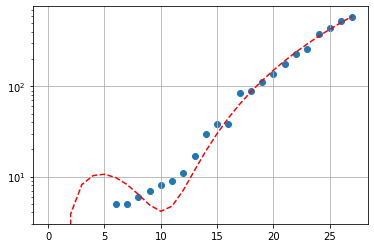

In [1206]:
calculate_and_create_chart_for_region(START_DATE, 'Abruzzo')

## Chieti

Total cases up to today: 102
New cases registered today: 11
Doubling time: 3.8
Trend of new cases (in %) in the last 5 days: 148.78


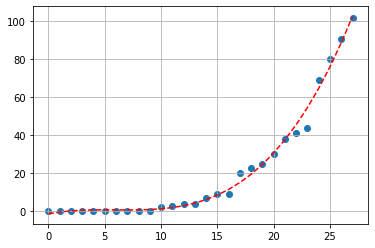

In [1207]:
calculate_and_create_chart_for_province(START_DATE, 'Chieti')

## L'Aquila

Total cases up to today: 38
New cases registered today: 7
Doubling time: 5.0
Trend of new cases (in %) in the last 5 days: 100.0


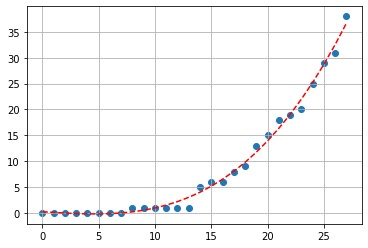

In [1289]:
calculate_and_create_chart_for_province(START_DATE, "L'Aquila")

## Pescara

Total cases up to today: 334
New cases registered today: 32
Doubling time: 3.9
Trend of new cases (in %) in the last 5 days: 142.03


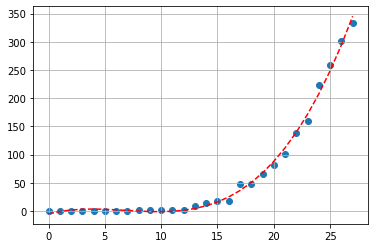

In [1209]:
calculate_and_create_chart_for_province(START_DATE, 'Pescara')

## Teramo

Total cases up to today: 113
New cases registered today: 8
Doubling time: 2.7
Trend of new cases (in %) in the last 5 days: 264.52


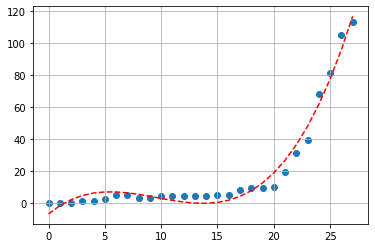

In [1290]:
calculate_and_create_chart_for_province(START_DATE, 'Teramo')

# Casi di COVID-19 in Basilicata - COVID-19 cases in Basilicata

Total cases up to today: 81
New cases registered today: 15
Doubling time: 2.5
Trend of new cases (in %) in the last 5 days: 305.0


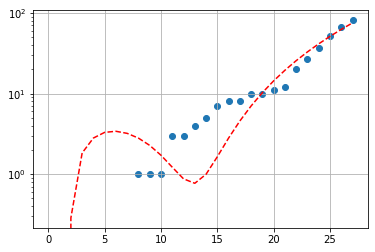

In [1211]:
calculate_and_create_chart_for_region(START_DATE, 'Basilicata')

## Matera

Total cases up to today: 16
New cases registered today: 8
Doubling time: 2.5
Trend of new cases (in %) in the last 5 days: 300.0


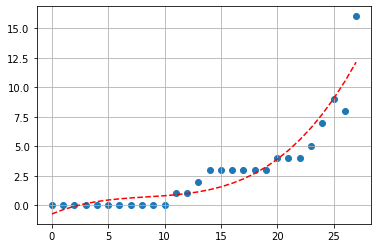

In [1212]:
calculate_and_create_chart_for_province(START_DATE, 'Matera')

## Potenza

Total cases up to today: 65
New cases registered today: 7
Doubling time: 2.5
Trend of new cases (in %) in the last 5 days: 306.25


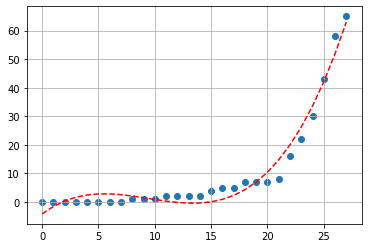

In [1213]:
calculate_and_create_chart_for_province(START_DATE, 'Potenza')

# Casi di COVID-19 nella Provincia Autonoma di Bolzano - COVID-19 cases in Autonomous Province of Bolzano

Total cases up to today: 678
New cases registered today: 57
Doubling time: 4.1
Trend of new cases (in %) in the last 5 days: 132.99


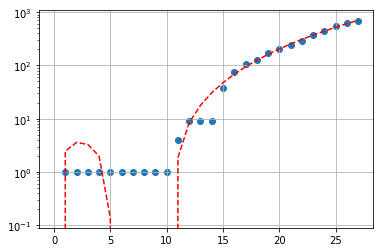

In [1214]:
calculate_and_create_chart_for_region(START_DATE, 'P.A. Bolzano')

# Casi di COVID-19 in Calabria - COVID-19 cases in Calabria

Total cases up to today: 273
New cases registered today: 38
Doubling time: 4.0
Trend of new cases (in %) in the last 5 days: 139.47


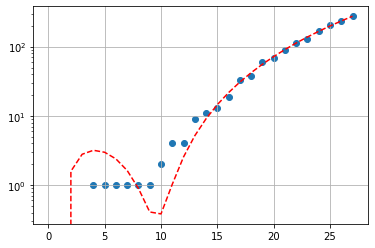

In [1215]:
calculate_and_create_chart_for_region(START_DATE, 'Calabria')

## Catanzaro

Total cases up to today: 45
New cases registered today: 7
Doubling time: 3.0
Trend of new cases (in %) in the last 5 days: 221.43


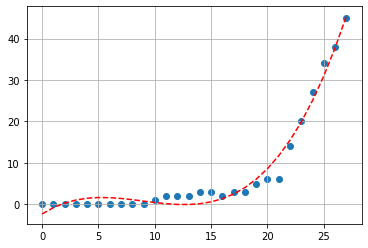

In [1216]:
calculate_and_create_chart_for_province(START_DATE, 'Catanzaro')

## Cosenza

Total cases up to today: 63
New cases registered today: 13
Doubling time: 4.1
Trend of new cases (in %) in the last 5 days: 133.33


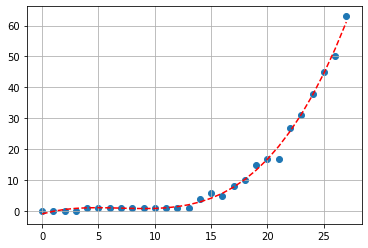

In [1217]:
calculate_and_create_chart_for_province(START_DATE, 'Cosenza')

## Crotone

Total cases up to today: 61
New cases registered today: 11
Doubling time: 3.3
Trend of new cases (in %) in the last 5 days: 190.48


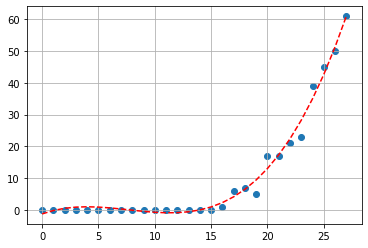

In [1218]:
calculate_and_create_chart_for_province(START_DATE, 'Crotone')

## Reggio di Calabria

Total cases up to today: 88
New cases registered today: 4
Doubling time: 5.3
Trend of new cases (in %) in the last 5 days: 91.3


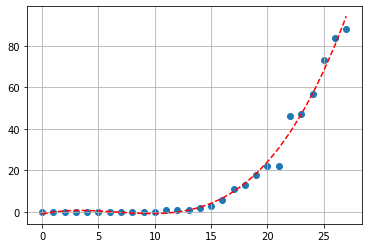

In [1219]:
calculate_and_create_chart_for_province(START_DATE, 'Reggio di Calabria')

## Vibo Valentia

Total cases up to today: 14
New cases registered today: 3
Doubling time: 4.1
Trend of new cases (in %) in the last 5 days: 133.33


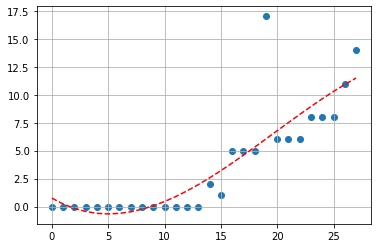

In [1220]:
calculate_and_create_chart_for_province(START_DATE, 'Vibo Valentia')

# Casi di COVID-19 in Campania - COVID-19 cases in Campania

Total cases up to today: 936
New cases registered today: 92
Doubling time: 4.9
Trend of new cases (in %) in the last 5 days: 103.48


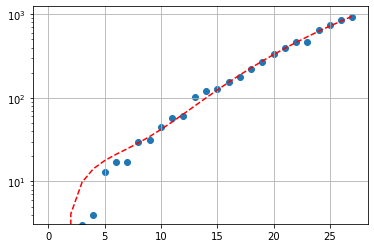

In [1221]:
calculate_and_create_chart_for_region(START_DATE, 'Campania')

## Avellino

Total cases up to today: 132
New cases registered today: 8
Doubling time: 4.0
Trend of new cases (in %) in the last 5 days: 135.71


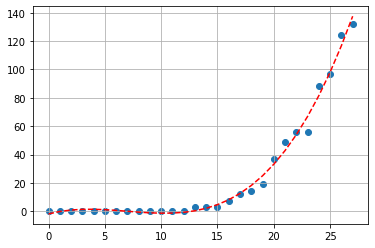

In [1222]:
calculate_and_create_chart_for_province(START_DATE, 'Avellino')

## Benevento

Total cases up to today: 13
New cases registered today: 2
Doubling time: 2.9
Trend of new cases (in %) in the last 5 days: 225.0


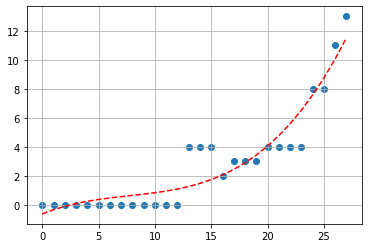

In [1223]:
calculate_and_create_chart_for_province(START_DATE, 'Benevento')

## Caserta

Total cases up to today: 116
New cases registered today: 10
Doubling time: 6.0
Trend of new cases (in %) in the last 5 days: 78.46


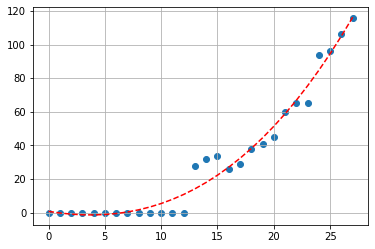

In [1224]:
calculate_and_create_chart_for_province(START_DATE, 'Caserta')

## Napoli

Total cases up to today: 504
New cases registered today: 41
Doubling time: 5.2
Trend of new cases (in %) in the last 5 days: 95.35


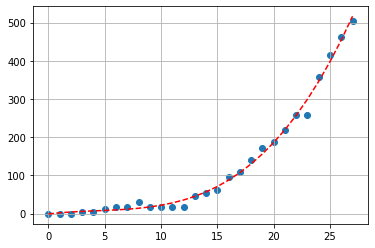

In [1225]:
calculate_and_create_chart_for_province(START_DATE, 'Napoli')

## Salerno

Total cases up to today: 157
New cases registered today: 31
Doubling time: 3.9
Trend of new cases (in %) in the last 5 days: 141.54


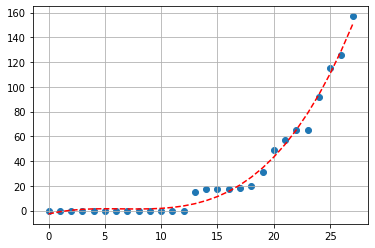

In [1226]:
calculate_and_create_chart_for_province(START_DATE, 'Salerno')

# Casi di COVID-19 in Emilia Romagna - COVID-19 cases in Emilia Romagna

Total cases up to today: 7555
New cases registered today: 850
Doubling time: 5.3
Trend of new cases (in %) in the last 5 days: 92.19


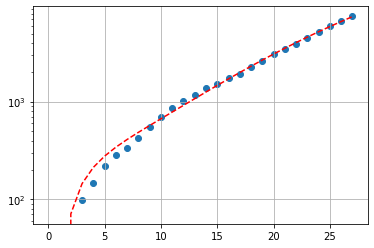

In [1227]:
calculate_and_create_chart_for_region(START_DATE, 'Emilia Romagna')

## Bologna

Total cases up to today: 674
New cases registered today: 64
Doubling time: 4.9
Trend of new cases (in %) in the last 5 days: 102.4


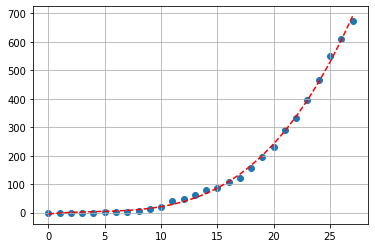

In [1228]:
calculate_and_create_chart_for_province(START_DATE, 'Bologna')

## Ferrara

Total cases up to today: 150
New cases registered today: 27
Doubling time: 3.6
Trend of new cases (in %) in the last 5 days: 158.62


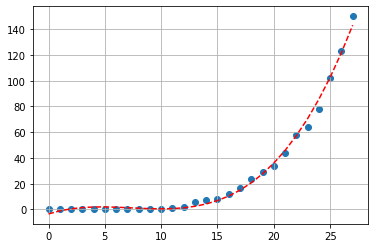

In [1229]:
calculate_and_create_chart_for_province(START_DATE, 'Ferrara')

## Forlì-Cesena

Total cases up to today: 329
New cases registered today: 60
Doubling time: 4.2
Trend of new cases (in %) in the last 5 days: 128.47


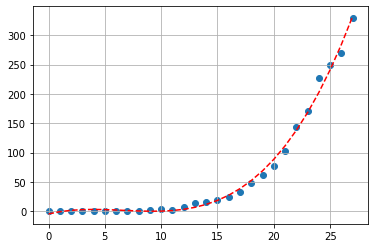

In [1230]:
calculate_and_create_chart_for_province(START_DATE, 'Forlì-Cesena')

## Modena

Total cases up to today: 1010
New cases registered today: 104
Doubling time: 4.4
Trend of new cases (in %) in the last 5 days: 119.57


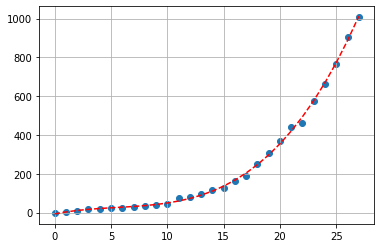

In [1231]:
calculate_and_create_chart_for_province(START_DATE, 'Modena')

## Parma

Total cases up to today: 1209
New cases registered today: 195
Doubling time: 8.4
Trend of new cases (in %) in the last 5 days: 51.12


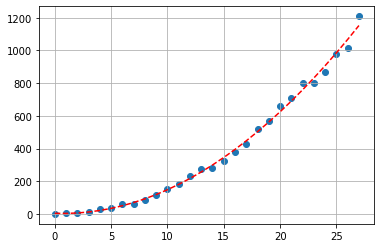

In [1232]:
calculate_and_create_chart_for_province(START_DATE, 'Parma')

## Piacenza

Total cases up to today: 1765
New cases registered today: 72
Doubling time: 9.1
Trend of new cases (in %) in the last 5 days: 46.59


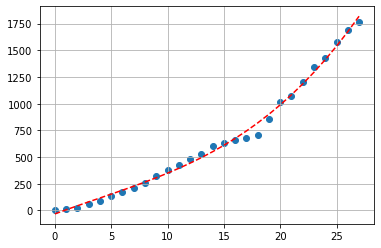

In [1233]:
calculate_and_create_chart_for_province(START_DATE, 'Piacenza')

## Ravenna

Total cases up to today: 309
New cases registered today: 22
Doubling time: 3.8
Trend of new cases (in %) in the last 5 days: 149.19


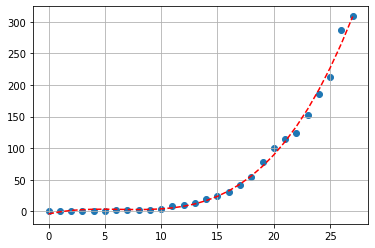

In [1234]:
calculate_and_create_chart_for_province(START_DATE, 'Ravenna')

## Reggio nell'Emilia

Total cases up to today: 1167
New cases registered today: 190
Doubling time: 2.5
Trend of new cases (in %) in the last 5 days: 290.3


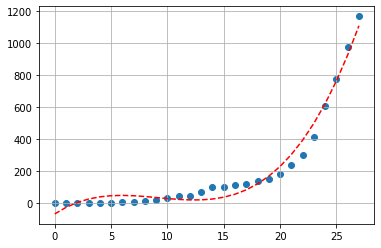

In [1235]:
calculate_and_create_chart_for_province(START_DATE, "Reggio nell'Emilia")

## Rimini

Total cases up to today: 942
New cases registered today: 116
Doubling time: 5.6
Trend of new cases (in %) in the last 5 days: 85.07


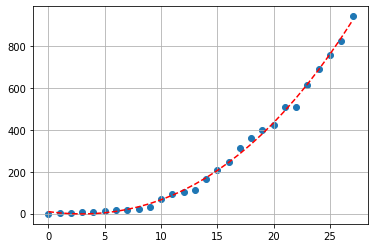

In [1236]:
calculate_and_create_chart_for_province(START_DATE, 'Rimini')

# Casi di COVID-19 in Friuli Venezia Giulia - COVID-19 cases in Friuli Venezia Giulia

Total cases up to today: 874
New cases registered today: 84
Doubling time: 4.3
Trend of new cases (in %) in the last 5 days: 121.83


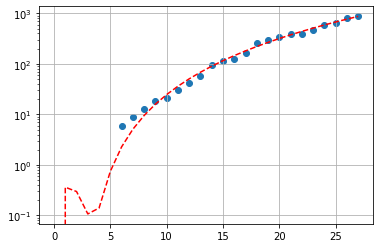

In [1237]:
calculate_and_create_chart_for_region(START_DATE, 'Friuli Venezia Giulia')

## Gorizia

Total cases up to today: 44
New cases registered today: 6
Doubling time: 3.9
Trend of new cases (in %) in the last 5 days: 144.44


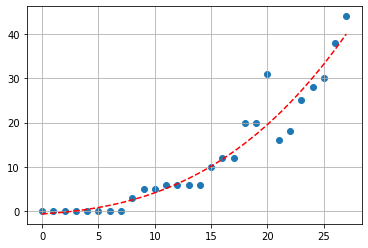

In [1238]:
calculate_and_create_chart_for_province(START_DATE, 'Gorizia')

## Pordenone

Total cases up to today: 165
New cases registered today: 21
Doubling time: 3.1
Trend of new cases (in %) in the last 5 days: 205.56


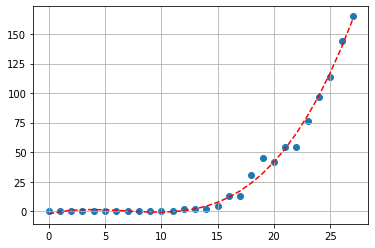

In [1239]:
calculate_and_create_chart_for_province(START_DATE, 'Pordenone')

## Trieste

Total cases up to today: 297
New cases registered today: 27
Doubling time: 6.7
Trend of new cases (in %) in the last 5 days: 67.8


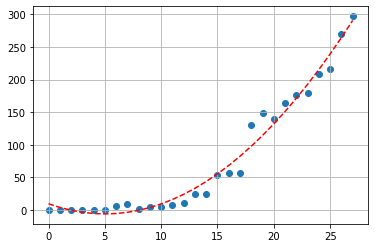

In [1240]:
calculate_and_create_chart_for_province(START_DATE, 'Trieste')

## Udine

Total cases up to today: 361
New cases registered today: 23
Doubling time: 3.8
Trend of new cases (in %) in the last 5 days: 148.97


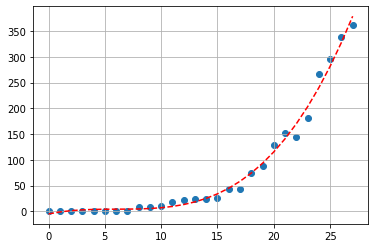

In [1241]:
calculate_and_create_chart_for_province(START_DATE, 'Udine')

# Casi di COVID-19 nel Lazio - COVID-19 cases in Lazio

Total cases up to today: 1383
New cases registered today: 193
Doubling time: 4.2
Trend of new cases (in %) in the last 5 days: 127.84


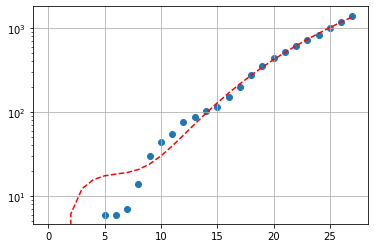

In [1242]:
calculate_and_create_chart_for_region(START_DATE, 'Lazio')

## Frosinone

Total cases up to today: 78
New cases registered today: 19
Doubling time: 7.5
Trend of new cases (in %) in the last 5 days: 59.18


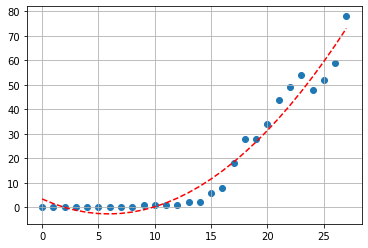

In [1243]:
calculate_and_create_chart_for_province(START_DATE, 'Frosinone')

## Latina

Total cases up to today: 146
New cases registered today: 10
Doubling time: 1.9
Trend of new cases (in %) in the last 5 days: 534.78


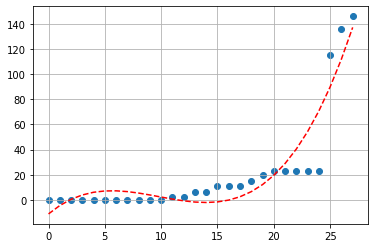

In [1244]:
calculate_and_create_chart_for_province(START_DATE, 'Latina')

## Rieti

Total cases up to today: 24
New cases registered today: 0
Doubling time: 5.0
Trend of new cases (in %) in the last 5 days: 100.0


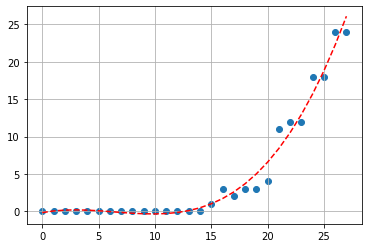

In [1245]:
calculate_and_create_chart_for_province(START_DATE, 'Rieti')

## Roma

Total cases up to today: 1049
New cases registered today: 156
Doubling time: 4.5
Trend of new cases (in %) in the last 5 days: 115.84


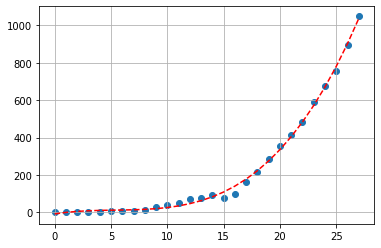

In [1246]:
calculate_and_create_chart_for_province(START_DATE, 'Roma')

## Viterbo

Total cases up to today: 82
New cases registered today: 10
Doubling time: 3.6
Trend of new cases (in %) in the last 5 days: 164.52


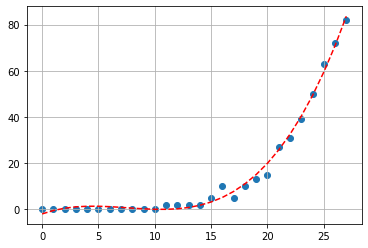

In [1247]:
calculate_and_create_chart_for_province(START_DATE, 'Viterbo')

# Casi di COVID-19 in Liguria - COVID-19 cases in Liguria

Total cases up to today: 1665
New cases registered today: 229
Doubling time: 4.6
Trend of new cases (in %) in the last 5 days: 114.01


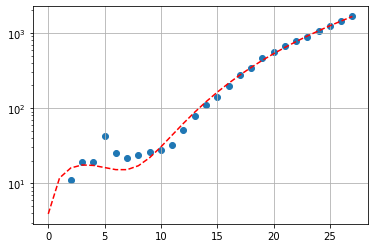

In [1248]:
calculate_and_create_chart_for_region(START_DATE, 'Liguria')

## Genova

Total cases up to today: 677
New cases registered today: 116
Doubling time: 4.8
Trend of new cases (in %) in the last 5 days: 105.15


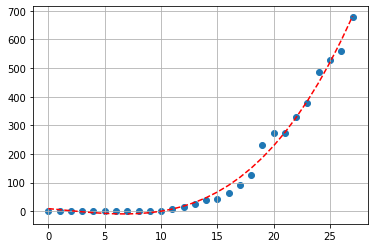

In [1249]:
calculate_and_create_chart_for_province(START_DATE, 'Genova')

## Imperia

Total cases up to today: 168
New cases registered today: 13
Doubling time: 4.4
Trend of new cases (in %) in the last 5 days: 121.05


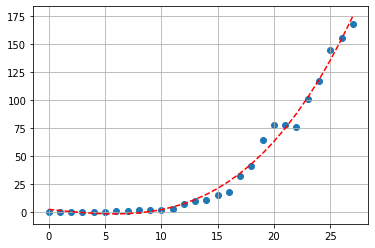

In [1250]:
calculate_and_create_chart_for_province(START_DATE, 'Imperia')

## La Spezia

Total cases up to today: 99
New cases registered today: 5
Doubling time: 8.2
Trend of new cases (in %) in the last 5 days: 52.31


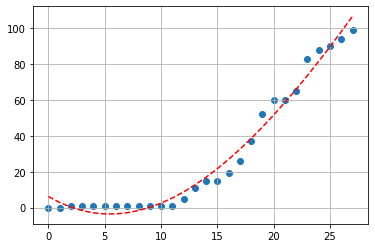

In [1251]:
calculate_and_create_chart_for_province(START_DATE, 'La Spezia')

## Savona

Total cases up to today: 175
New cases registered today: 2
Doubling time: 6.2
Trend of new cases (in %) in the last 5 days: 75.0


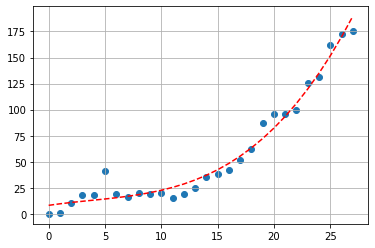

In [1252]:
calculate_and_create_chart_for_province(START_DATE, 'Savona')

# Casi di COVID-19 in Lombardia - COVID-19 cases in Lombardy

Total cases up to today: 27206
New cases registered today: 1691
Doubling time: 6.7
Trend of new cases (in %) in the last 5 days: 67.73


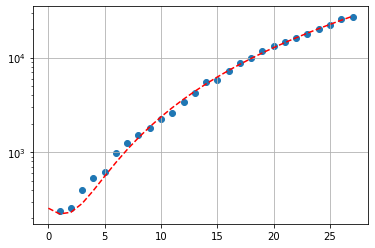

In [1253]:
calculate_and_create_chart_for_region(START_DATE, 'Lombardia')

## Bergamo

Total cases up to today: 6216
New cases registered today: 347
Doubling time: 7.8
Trend of new cases (in %) in the last 5 days: 55.67


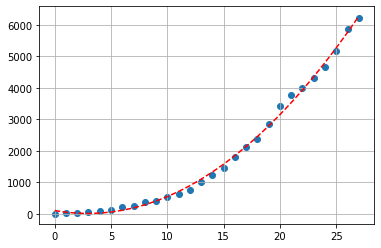

In [1254]:
calculate_and_create_chart_for_province(START_DATE, 'Bergamo')

## Brescia

Total cases up to today: 5317
New cases registered today: 289
Doubling time: 7.3
Trend of new cases (in %) in the last 5 days: 61.12


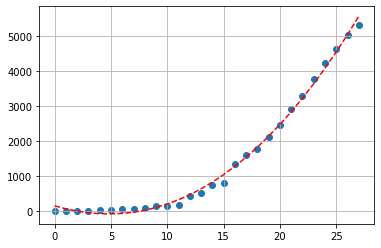

In [1255]:
calculate_and_create_chart_for_province(START_DATE, 'Brescia')

## Como

Total cases up to today: 512
New cases registered today: 60
Doubling time: 5.0
Trend of new cases (in %) in the last 5 days: 100.0


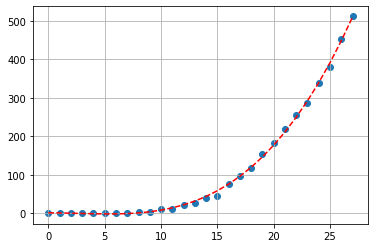

In [1256]:
calculate_and_create_chart_for_province(START_DATE, 'Como')

## Cremona

Total cases up to today: 2895
New cases registered today: 162
Doubling time: 10.4
Trend of new cases (in %) in the last 5 days: 39.65


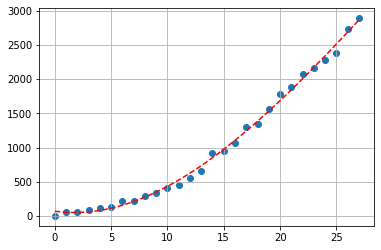

In [1257]:
calculate_and_create_chart_for_province(START_DATE, 'Cremona')

## Lecco

Total cases up to today: 872
New cases registered today: 54
Doubling time: 5.1
Trend of new cases (in %) in the last 5 days: 98.18


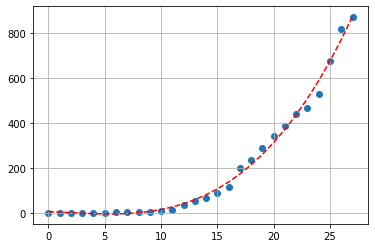

In [1258]:
calculate_and_create_chart_for_province(START_DATE, 'Lecco')

## Lodi

Total cases up to today: 1772
New cases registered today: 79
Doubling time: 15.6
Trend of new cases (in %) in the last 5 days: 24.96


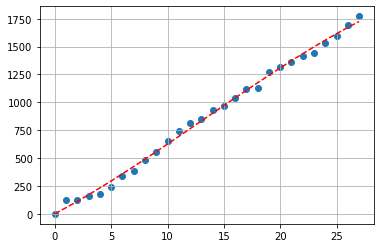

In [1259]:
calculate_and_create_chart_for_province(START_DATE, 'Lodi')

## Mantova

Total cases up to today: 905
New cases registered today: 63
Doubling time: 5.2
Trend of new cases (in %) in the last 5 days: 94.62


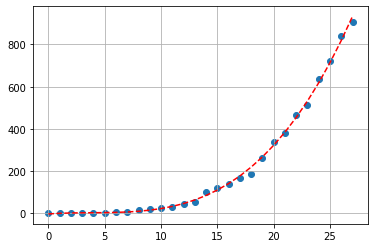

In [1260]:
calculate_and_create_chart_for_province(START_DATE, 'Mantova')

## Milano

Total cases up to today: 5096
New cases registered today: 424
Doubling time: 4.4
Trend of new cases (in %) in the last 5 days: 119.09


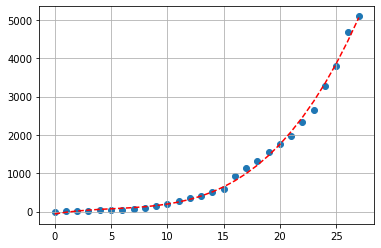

In [1261]:
calculate_and_create_chart_for_province(START_DATE, 'Milano')

## Monza e della Brianza

Total cases up to today: 1108
New cases registered today: 24
Doubling time: 3.2
Trend of new cases (in %) in the last 5 days: 194.68


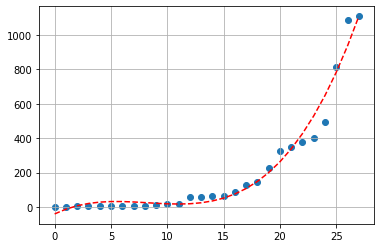

In [1262]:
calculate_and_create_chart_for_province(START_DATE, 'Monza e della Brianza')

## Pavia

Total cases up to today: 1306
New cases registered today: 112
Doubling time: 8.9
Trend of new cases (in %) in the last 5 days: 47.74


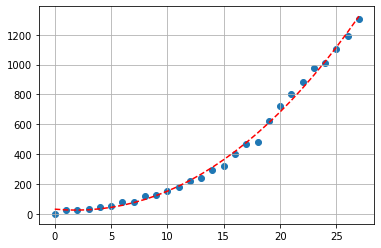

In [1263]:
calculate_and_create_chart_for_province(START_DATE, 'Pavia')

## Sondrio

Total cases up to today: 205
New cases registered today: 26
Doubling time: 3.4
Trend of new cases (in %) in the last 5 days: 177.03


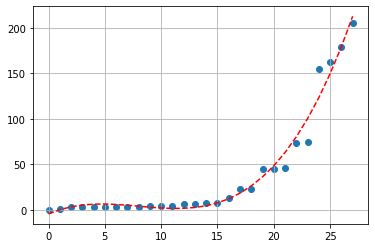

In [1264]:
calculate_and_create_chart_for_province(START_DATE, 'Sondrio')

## Varese

Total cases up to today: 386
New cases registered today: 27
Doubling time: 6.9
Trend of new cases (in %) in the last 5 days: 64.96


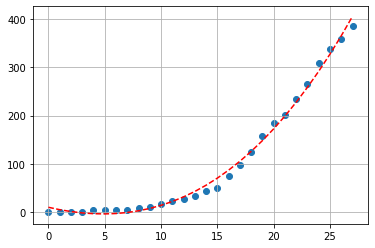

In [1265]:
calculate_and_create_chart_for_province(START_DATE, 'Varese')

# Casi di COVID-19 nelle Marche - COVID-19 cases in Marche

Total cases up to today: 2421
New cases registered today: 268
Doubling time in the last five days: 6.1
Trend of new cases (in %) in the last 5 days: 76.59


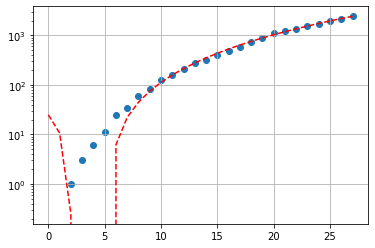

In [8]:
calculate_and_create_chart_for_region(START_DATE, 'Marche')

## Ancona

Total cases up to today: 676
New cases registered today: 112
Doubling time in the last five days: 5.4
Trend of new cases (in %) in the last 5 days: 89.89


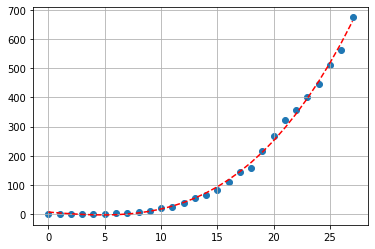

In [9]:
calculate_and_create_chart_for_province(START_DATE, 'Ancona')

## Ascoli Piceno

Total cases up to today: 56
New cases registered today: 6
Doubling time in the last five days: 3.9
Trend of new cases (in %) in the last 5 days: 143.48


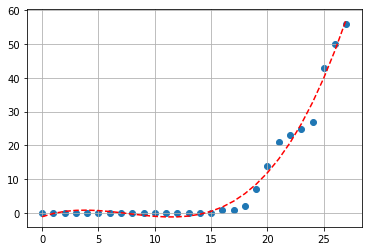

In [10]:
calculate_and_create_chart_for_province(START_DATE, 'Ascoli Piceno')

## Fermo

Total cases up to today: 113
New cases registered today: 31
Doubling time in the last five days: 3.0
Trend of new cases (in %) in the last 5 days: 213.89


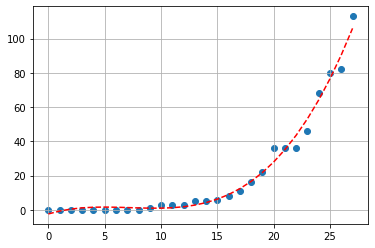

In [11]:
calculate_and_create_chart_for_province(START_DATE, 'Fermo')

## Macerata

Total cases up to today: 293
New cases registered today: 55
Doubling time in the last five days: 4.2
Trend of new cases (in %) in the last 5 days: 128.91


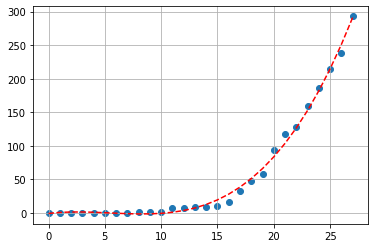

In [12]:
calculate_and_create_chart_for_province(START_DATE, 'Macerata')

## Pesaro e Urbino

Total cases up to today: 1249
New cases registered today: 63
Doubling time in the last five days: 8.0
Trend of new cases (in %) in the last 5 days: 53.82


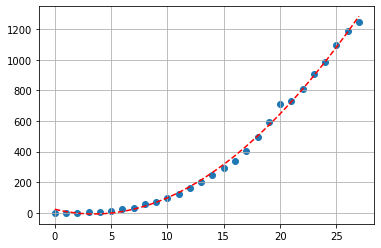

In [13]:
calculate_and_create_chart_for_province(START_DATE, 'Pesaro e Urbino')

# Casi di COVID-19 in Molise - COVID-19 cases in Molise¶

Total cases up to today: 66
New cases registered today: 5
Doubling time in the last five days: 3.6
Trend of new cases (in %) in the last 5 days: 164.0


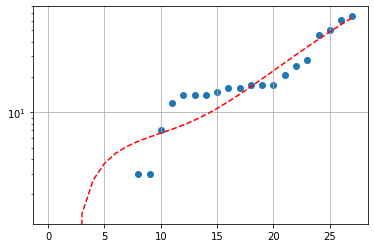

In [17]:
calculate_and_create_chart_for_region(START_DATE, 'Molise')

## Campobasso

Total cases up to today: 53
New cases registered today: 4
Doubling time in the last five days: 4.6
Trend of new cases (in %) in the last 5 days: 112.0


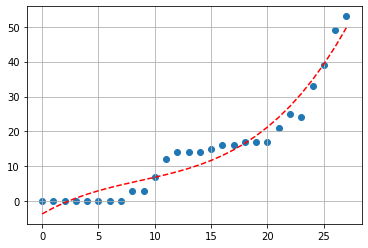

In [14]:
calculate_and_create_chart_for_province(START_DATE, 'Campobasso')

Total cases up to today: 4
New cases registered today: 0
Doubling time in the last five days: 0.0
Trend of new cases (in %) in the last 5 days: inf


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in long_scalars
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  


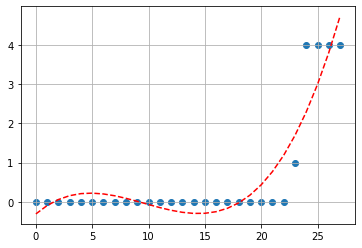

In [19]:
calculate_and_create_chart_for_province(START_DATE, 'Isernia')

# Casi di COVID-19 in Piemonte - COVID-19 cases in Piedmont 

Total cases up to today: 4420
New cases registered today: 668
Doubling time in the last five days: 4.1
Trend of new cases (in %) in the last 5 days: 133.0


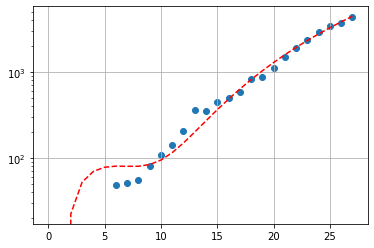

In [20]:
calculate_and_create_chart_for_region(START_DATE, 'Piemonte')

## Alessandria

Total cases up to today: 760
New cases registered today: 106
Doubling time in the last five days: 4.1
Trend of new cases (in %) in the last 5 days: 135.29


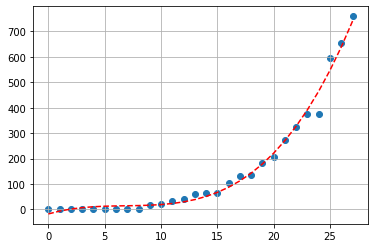

In [21]:
calculate_and_create_chart_for_province(START_DATE, 'Alessandria')

## Asti

Total cases up to today: 181
New cases registered today: 15
Doubling time in the last five days: 5.0
Trend of new cases (in %) in the last 5 days: 101.11


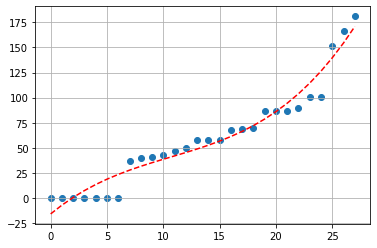

In [22]:
calculate_and_create_chart_for_province(START_DATE, 'Asti')

## Biella

Total cases up to today: 243
New cases registered today: 61
Doubling time in the last five days: 3.7
Trend of new cases (in %) in the last 5 days: 153.12


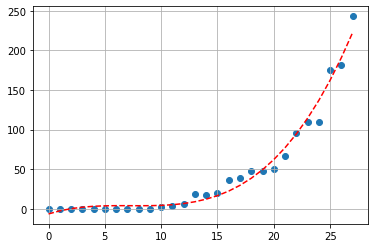

In [23]:
calculate_and_create_chart_for_province(START_DATE, 'Biella')

## Cuneo

Total cases up to today: 303
New cases registered today: 38
Doubling time in the last five days: 3.7
Trend of new cases (in %) in the last 5 days: 154.62


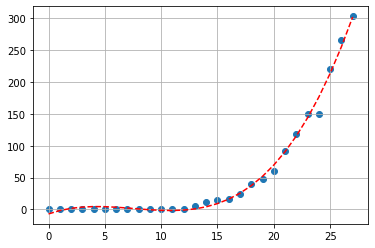

In [24]:
calculate_and_create_chart_for_province(START_DATE, 'Cuneo')

## Novara

Total cases up to today: 398
New cases registered today: 68
Doubling time in the last five days: 3.6
Trend of new cases (in %) in the last 5 days: 165.33


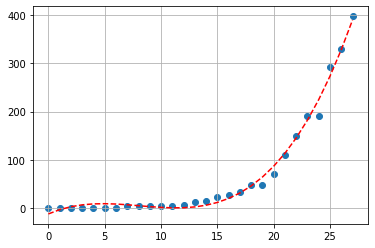

In [25]:
calculate_and_create_chart_for_province(START_DATE, 'Novara')

## Torino

Total cases up to today: 1989
New cases registered today: 309
Doubling time in the last five days: 3.5
Trend of new cases (in %) in the last 5 days: 165.55


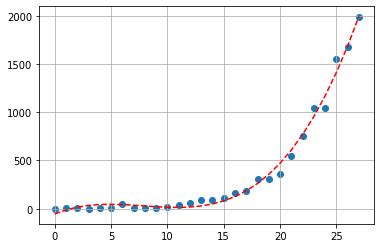

In [26]:
calculate_and_create_chart_for_province(START_DATE, 'Torino')

## 	Verbano-Cusio-Ossola

Total cases up to today: 159
New cases registered today: 10
Doubling time in the last five days: 4.7
Trend of new cases (in %) in the last 5 days: 109.21


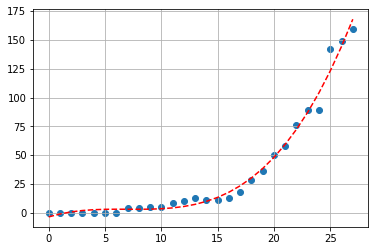

In [27]:
calculate_and_create_chart_for_province(START_DATE, 'Verbano-Cusio-Ossola')

## Vercelli

Total cases up to today: 242
New cases registered today: 32
Doubling time in the last five days: 4.6
Trend of new cases (in %) in the last 5 days: 114.16


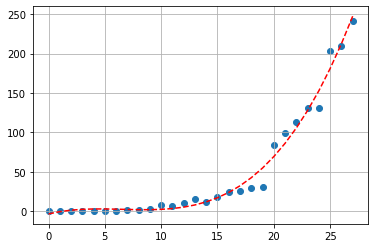

In [28]:
calculate_and_create_chart_for_province(START_DATE, 'Vercelli')

# Casi di COVID-19 in Puglia - COVID-19 cases in Puglia

Total cases up to today: 786
New cases registered today: 111
Doubling time in the last five days: 4.1
Trend of new cases (in %) in the last 5 days: 131.18


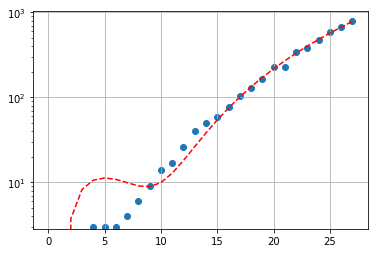

In [29]:
calculate_and_create_chart_for_region(START_DATE, 'Puglia')

## Bari

Total cases up to today: 231
New cases registered today: 37
Doubling time in the last five days: 3.9
Trend of new cases (in %) in the last 5 days: 143.16


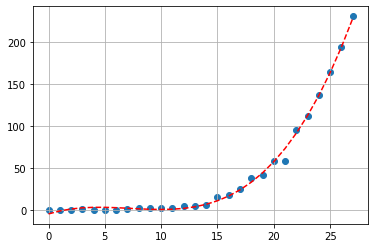

In [30]:
calculate_and_create_chart_for_province(START_DATE, 'Bari')

## 	Barletta-Andria-Trani

Total cases up to today: 49
New cases registered today: 17
Doubling time in the last five days: 4.6
Trend of new cases (in %) in the last 5 days: 113.04


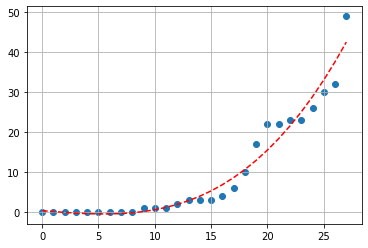

In [31]:
calculate_and_create_chart_for_province(START_DATE, 'Barletta-Andria-Trani')

## Brindisi

Total cases up to today: 100
New cases registered today: 6
Doubling time in the last five days: 5.3
Trend of new cases (in %) in the last 5 days: 92.31


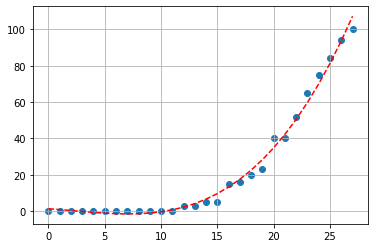

In [32]:
calculate_and_create_chart_for_province(START_DATE, 'Brindisi')

## Foggia

Total cases up to today: 212
New cases registered today: 22
Doubling time in the last five days: 4.1
Trend of new cases (in %) in the last 5 days: 132.97


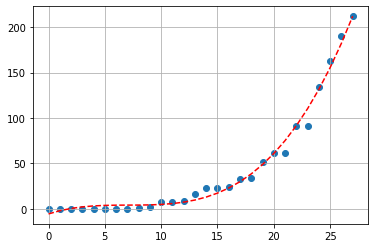

In [33]:
calculate_and_create_chart_for_province(START_DATE, 'Foggia')

## Lecce

Total cases up to today: 120
New cases registered today: 17
Doubling time in the last five days: 5.2
Trend of new cases (in %) in the last 5 days: 93.55


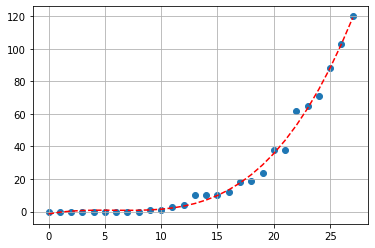

In [34]:
calculate_and_create_chart_for_province(START_DATE, 'Lecce')

## Taranto

Total cases up to today: 41
New cases registered today: 6
Doubling time in the last five days: 3.9
Trend of new cases (in %) in the last 5 days: 141.18


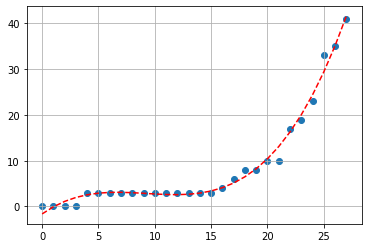

In [35]:
calculate_and_create_chart_for_province(START_DATE, 'Taranto')

# Casi di COVID-19 in Sardegna - COVID-19 cases in Sardinia

Total cases up to today: 339
New cases registered today: 9
Doubling time in the last five days: 3.3
Trend of new cases (in %) in the last 5 days: 189.74


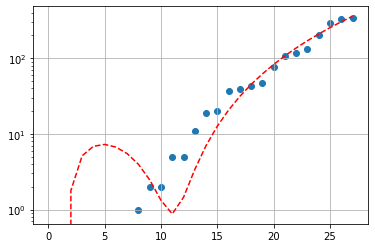

In [36]:
calculate_and_create_chart_for_region(START_DATE, 'Sardegna')

## Cagliari

Total cases up to today: 52
New cases registered today: 7
Doubling time in the last five days: 5.3
Trend of new cases (in %) in the last 5 days: 92.59


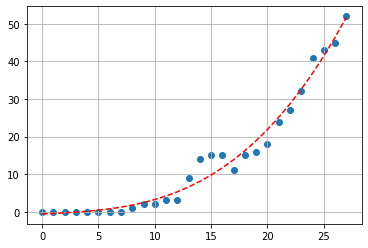

In [37]:
calculate_and_create_chart_for_province(START_DATE, 'Cagliari')

## Nuoro

Total cases up to today: 22
New cases registered today: 0
Doubling time in the last five days: 36.4
Trend of new cases (in %) in the last 5 days: 10.0


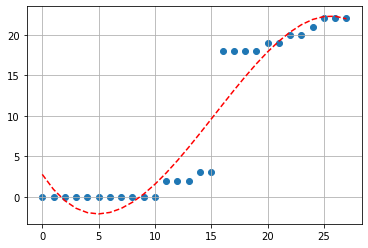

In [38]:
calculate_and_create_chart_for_province(START_DATE, 'Nuoro')

## Oristano

Total cases up to today: 4
New cases registered today: 0
Doubling time in the last five days: 5.0
Trend of new cases (in %) in the last 5 days: 100.0


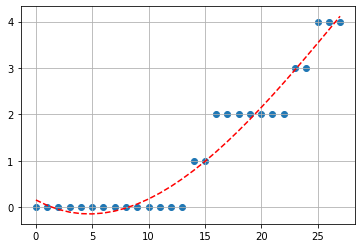

In [39]:
calculate_and_create_chart_for_province(START_DATE, 'Oristano')

## Sassari

Total cases up to today: 253
New cases registered today: 2
Doubling time in the last five days: 2.5
Trend of new cases (in %) in the last 5 days: 301.59


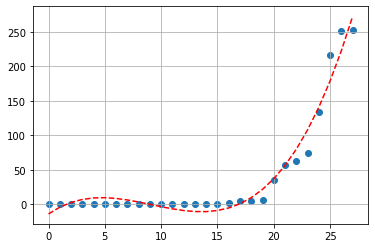

In [40]:
calculate_and_create_chart_for_province(START_DATE, 'Sassari')

# Casi di COVID-19 in Sicilia - COVID-19 cases in Sicily

Total cases up to today: 630
New cases registered today: 140
Doubling time: 3.5
Trend of new cases (in %) in the last 5 days: 165.82


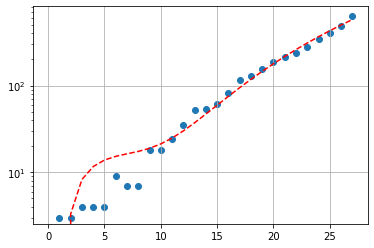

In [1266]:
calculate_and_create_chart_for_region(START_DATE, 'Sicilia')

## Agrigento

Total cases up to today: 41
New cases registered today: 5
Doubling time: 5.6
Trend of new cases (in %) in the last 5 days: 86.36


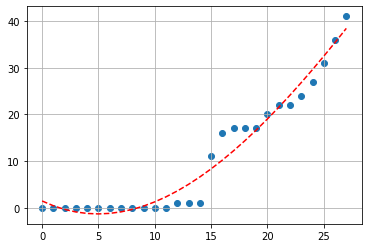

In [1267]:
calculate_and_create_chart_for_province(START_DATE, 'Agrigento')

## Caltanissetta

Total cases up to today: 27
New cases registered today: 0
Doubling time: 1.8
Trend of new cases (in %) in the last 5 days: 575.0


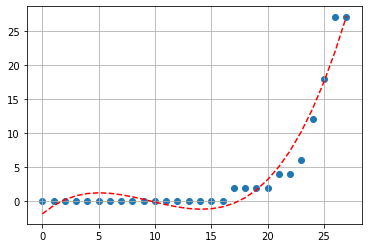

In [1268]:
calculate_and_create_chart_for_province(START_DATE, 'Caltanissetta')

## Catania

Total cases up to today: 234
New cases registered today: 45
Doubling time: 4.5
Trend of new cases (in %) in the last 5 days: 116.67


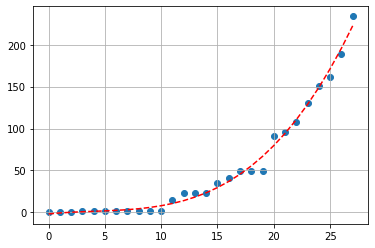

In [1269]:
calculate_and_create_chart_for_province(START_DATE, 'Catania')

## Enna

Total cases up to today: 34
New cases registered today: 7
Doubling time: 2.4
Trend of new cases (in %) in the last 5 days: 325.0


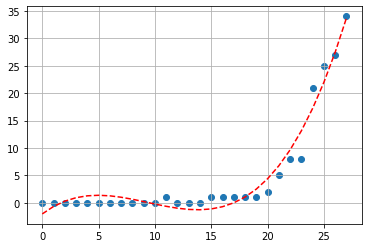

In [1270]:
calculate_and_create_chart_for_province(START_DATE, 'Enna')

## Messina

Total cases up to today: 112
New cases registered today: 42
Doubling time: 1.8
Trend of new cases (in %) in the last 5 days: 600.0


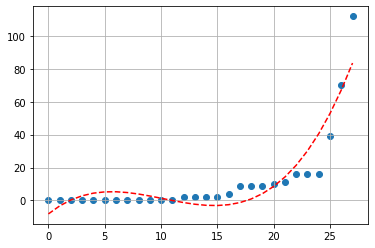

In [1271]:
calculate_and_create_chart_for_province(START_DATE, 'Messina')

## Palermo

Total cases up to today: 92
New cases registered today: 29
Doubling time: 4.2
Trend of new cases (in %) in the last 5 days: 130.0


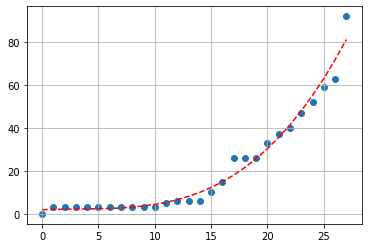

In [1272]:
calculate_and_create_chart_for_province(START_DATE, 'Palermo')

## Ragusa

Total cases up to today: 9
New cases registered today: 1
Doubling time: 4.3
Trend of new cases (in %) in the last 5 days: 125.0


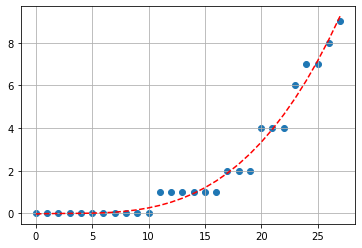

In [1273]:
calculate_and_create_chart_for_province(START_DATE, 'Ragusa')

## Siracusa

Total cases up to today: 49
New cases registered today: 6
Doubling time: 4.1
Trend of new cases (in %) in the last 5 days: 133.33


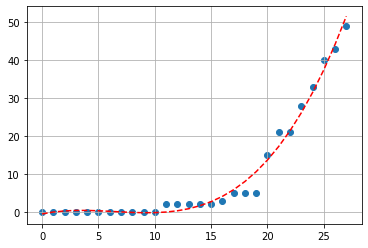

In [1274]:
calculate_and_create_chart_for_province(START_DATE, 'Siracusa')

## Trapani

Total cases up to today: 32
New cases registered today: 5
Doubling time: 4.2
Trend of new cases (in %) in the last 5 days: 128.57


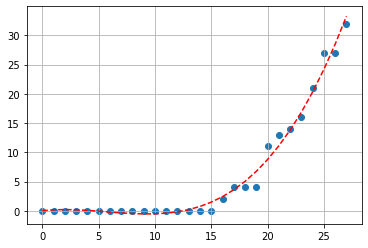

In [1275]:
calculate_and_create_chart_for_province(START_DATE, 'Trapani')

# Casi di COVID-19 in Toscana - COVID-19 cases in Tuscany

Total cases up to today: 2277
New cases registered today: 265
Doubling time: 4.5
Trend of new cases (in %) in the last 5 days: 116.24


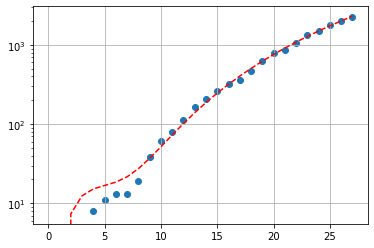

In [1276]:
calculate_and_create_chart_for_region(START_DATE, 'Toscana')

## Arezzo

Total cases up to today: 154
New cases registered today: 18
Doubling time: 4.5
Trend of new cases (in %) in the last 5 days: 116.9


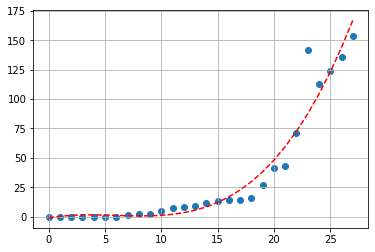

In [1277]:
calculate_and_create_chart_for_province(START_DATE, 'Arezzo')

## Firenze

Total cases up to today: 514
New cases registered today: 63
Doubling time: 4.0
Trend of new cases (in %) in the last 5 days: 140.19


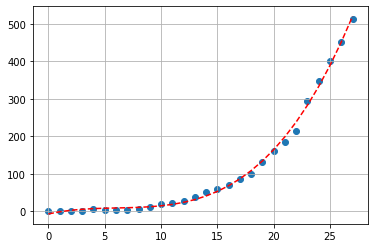

In [1278]:
calculate_and_create_chart_for_province(START_DATE, 'Firenze')

## Grosseto

Total cases up to today: 120
New cases registered today: 14
Doubling time: 5.0
Trend of new cases (in %) in the last 5 days: 100.0


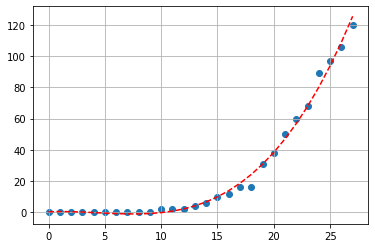

In [1279]:
calculate_and_create_chart_for_province(START_DATE, 'Grosseto')

## Livorno

Total cases up to today: 130
New cases registered today: 10
Doubling time: 4.4
Trend of new cases (in %) in the last 5 days: 120.34


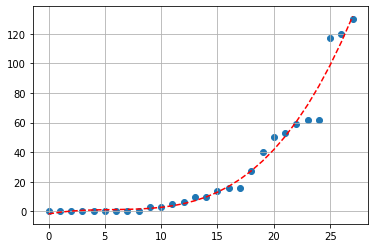

In [1280]:
calculate_and_create_chart_for_province(START_DATE, 'Livorno')

## Lucca

Total cases up to today: 356
New cases registered today: 49
Doubling time: 5.0
Trend of new cases (in %) in the last 5 days: 98.88


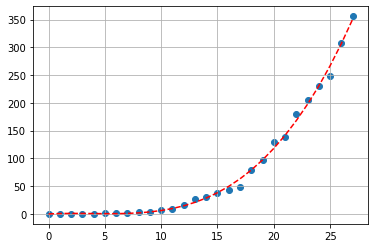

In [1281]:
calculate_and_create_chart_for_province(START_DATE, 'Lucca')

## Massa Carrara

Total cases up to today: 281
New cases registered today: 25
Doubling time: 5.1
Trend of new cases (in %) in the last 5 days: 96.5


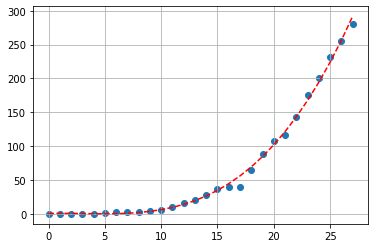

In [1282]:
calculate_and_create_chart_for_province(START_DATE, 'Massa Carrara')

## Pisa

Total cases up to today: 234
New cases registered today: 23
Doubling time: 4.1
Trend of new cases (in %) in the last 5 days: 131.68


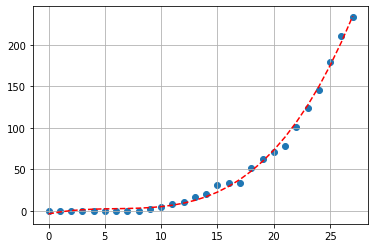

In [1283]:
calculate_and_create_chart_for_province(START_DATE, 'Pisa')

## Pistoia

Total cases up to today: 215
New cases registered today: 34
Doubling time: 4.5
Trend of new cases (in %) in the last 5 days: 115.0


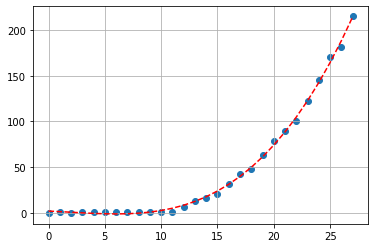

In [1284]:
calculate_and_create_chart_for_province(START_DATE, 'Pistoia')

## Prato

Total cases up to today: 129
New cases registered today: 18
Doubling time: 3.9
Trend of new cases (in %) in the last 5 days: 143.4


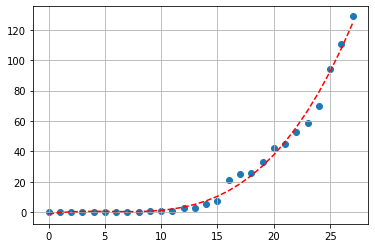

In [1285]:
calculate_and_create_chart_for_province(START_DATE, 'Prato')

## Siena

Total cases up to today: 144
New cases registered today: 11
Doubling time: 5.1
Trend of new cases (in %) in the last 5 days: 97.26


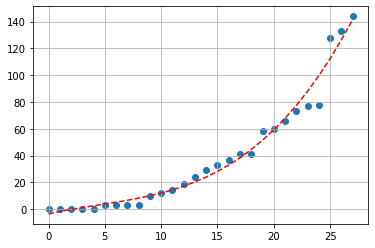

In [1286]:
calculate_and_create_chart_for_province(START_DATE, 'Siena')

# Casi di COVID-19 in Provincia Autonoma di Trento - COVID-19 cases in the Autonomous Province of Trento

Total cases up to today: 954
New cases registered today: 172
Doubling time in the last five days: 3.8
Trend of new cases (in %) in the last 5 days: 147.79


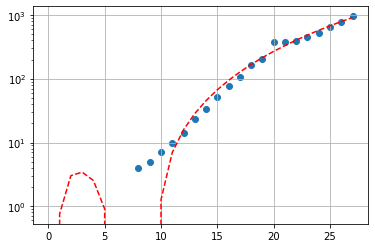

In [41]:
calculate_and_create_chart_for_region(START_DATE, 'P.A. Trento')

# Casi di COVID-19 in Umbria - COVID-19 cases in Umbria

Total cases up to today: 521
New cases registered today: 59
Doubling time in the last five days: 3.6
Trend of new cases (in %) in the last 5 days: 164.47


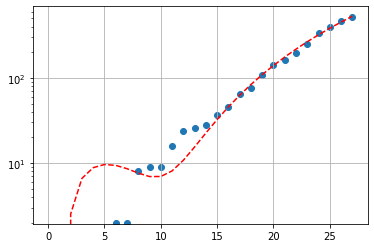

In [42]:
calculate_and_create_chart_for_region(START_DATE, 'Umbria')

## Perugia

Total cases up to today: 376
New cases registered today: 47
Doubling time in the last five days: 3.2
Trend of new cases (in %) in the last 5 days: 191.47


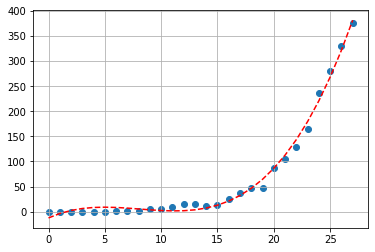

In [43]:
calculate_and_create_chart_for_province(START_DATE, 'Perugia')

## Terni

Total cases up to today: 128
New cases registered today: 13
Doubling time in the last five days: 4.9
Trend of new cases (in %) in the last 5 days: 103.17


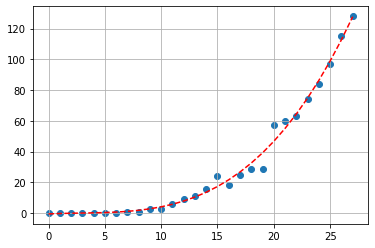

In [44]:
calculate_and_create_chart_for_province(START_DATE, 'Terni')

# Casi di COVID-19 in Valle d'Aosta - COVID-19 cases in Aosta Valley

Total cases up to today: 364
New cases registered today: 51
Doubling time in the last five days: 3.5
Trend of new cases (in %) in the last 5 days: 167.65


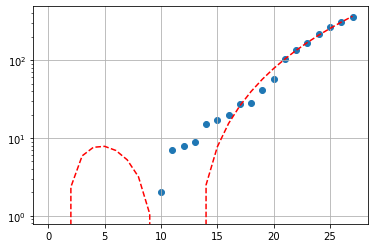

In [46]:
calculate_and_create_chart_for_region(START_DATE, "Valle d'Aosta")

# Casi di COVID-19 in Veneto - COVID-19 cases in Veneto

Total cases up to today: 5122
New cases registered today: 505
Doubling time: 5.4
Trend of new cases (in %) in the last 5 days: 89.42


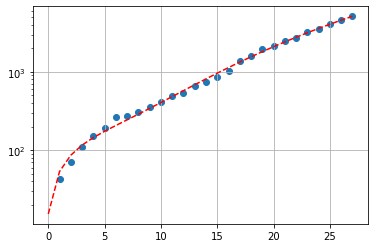

In [1287]:
calculate_and_create_chart_for_region(START_DATE, 'Veneto')

## Belluno

Total cases up to today: 226
New cases registered today: 14
Doubling time in the last five days: 4.8
Trend of new cases (in %) in the last 5 days: 107.34


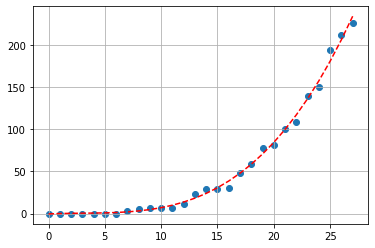

In [47]:
calculate_and_create_chart_for_province(START_DATE, 'Belluno')

## Padova

Total cases up to today: 1277
New cases registered today: 122
Doubling time: 7.0
Trend of new cases (in %) in the last 5 days: 63.51


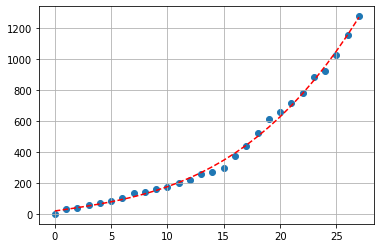

In [1288]:
calculate_and_create_chart_for_province(START_DATE, 'Padova')

## Rovigo

Total cases up to today: 76
New cases registered today: 8
Doubling time in the last five days: 3.5
Trend of new cases (in %) in the last 5 days: 171.43


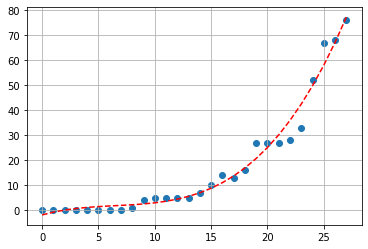

In [48]:
calculate_and_create_chart_for_province(START_DATE, 'Rovigo')

## Treviso

Total cases up to today: 935
New cases registered today: 129
Doubling time in the last five days: 5.6
Trend of new cases (in %) in the last 5 days: 86.25


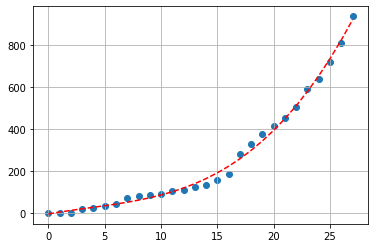

In [49]:
calculate_and_create_chart_for_province(START_DATE, 'Treviso')

## Venezia

Total cases up to today: 732
New cases registered today: 66
Doubling time in the last five days: 5.2
Trend of new cases (in %) in the last 5 days: 93.65


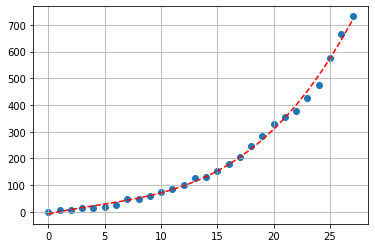

In [50]:
calculate_and_create_chart_for_province(START_DATE, 'Venezia')

## Verona

Total cases up to today: 1046
New cases registered today: 92
Doubling time in the last five days: 4.5
Trend of new cases (in %) in the last 5 days: 117.46


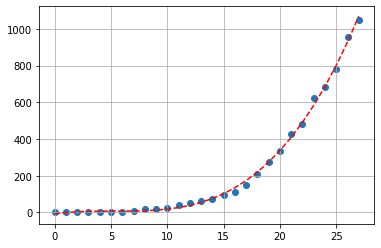

In [51]:
calculate_and_create_chart_for_province(START_DATE, 'Verona')

## Vicenza

Total cases up to today: 631
New cases registered today: 59
Doubling time in the last five days: 5.2
Trend of new cases (in %) in the last 5 days: 94.15


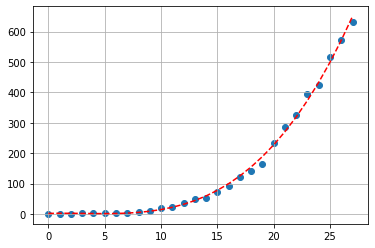

In [52]:
calculate_and_create_chart_for_province(START_DATE, 'Vicenza')